In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-turbulence-dataset/kepsilonphitf.csv
/kaggle/input/ml-turbulence-dataset/komegasst.csv
/kaggle/input/ml-turbulence-dataset/kepsilon.csv
/kaggle/input/ml-turbulence-dataset/komega.csv
/kaggle/input/ml-turbulence-dataset/labels/PHLL_case_1p5_vv.npy
/kaggle/input/ml-turbulence-dataset/labels/DUCT_2205_vw.npy
/kaggle/input/ml-turbulence-dataset/labels/DUCT_1400_vm.npy
/kaggle/input/ml-turbulence-dataset/labels/DUCT_3200_wm.npy
/kaggle/input/ml-turbulence-dataset/labels/CBFS_13700_k.npy
/kaggle/input/ml-turbulence-dataset/labels/CNDV_12600_vw.npy
/kaggle/input/ml-turbulence-dataset/labels/DUCT_2600_wm.npy
/kaggle/input/ml-turbulence-dataset/labels/DUCT_1150_uv.npy
/kaggle/input/ml-turbulence-dataset/labels/BUMP_h26_vv.npy
/kaggle/input/ml-turbulence-dataset/labels/DUCT_2400_ww.npy
/kaggle/input/ml-turbulence-dataset/labels/PHLL_case_1p0_k.npy
/kaggle/input/ml-turbulence-dataset/labels/BUMP_h20_b.npy
/kaggle/input/ml-turbulence-dataset/labels/DUCT_1150_vw.npy
/kaggle/input/m

In [2]:
import pandas as pd

# تحميل الملف
file_path = "/kaggle/input/ml-turbulence-dataset/komegasst.csv"  
data = pd.read_csv(file_path)

# عرض نظرة عامة على البيانات
print(data.head())
print(data.columns)


   Unnamed: 0  komegasst_Cx  komegasst_Cy  komegasst_Cz  komegasst_Ux  \
0           0       7.03529         3.034          0.05      0.001759   
1           1       6.96386         3.034          0.05      0.001750   
2           2       6.89244         3.034          0.05      0.001741   
3           3       6.82101         3.034          0.05      0.001735   
4           4       6.74959         3.034          0.05      0.001720   

   komegasst_Uy  komegasst_Uz  komegasst_p  komegasst_omega  \
0  2.598550e-08 -1.451590e-25    -0.000056           99.994   
1  1.928530e-07  1.452110e-25    -0.000054          100.004   
2 -1.231850e-08  2.700380e-25    -0.000052          100.037   
3  2.036270e-07  2.588460e-25    -0.000050          100.050   
4  1.597590e-07  0.000000e+00    -0.000048          100.045   

   komegasst_epsilon  ...  labels_um     labels_vm  labels_wm     labels_uu  \
0       8.274670e-07  ...   0.001764  2.535930e-07   0.000002  9.099550e-07   
1       8.189720e-07  ..

In [3]:
data = data.dropna()

In [4]:
data = data.drop(columns=['Unnamed: 0', 'Case'])

In [5]:
data = data[(data['komegasst_Ux'] > -10) & (data['komegasst_Ux'] < 10)]

In [6]:
from sklearn.preprocessing import MinMaxScaler

features = ['komegasst_Ux', 'komegasst_Uy', 'komegasst_Uz', 'komegasst_omega', 'komegasst_epsilon']
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [7]:
print(data.head())
print(data.describe())

   komegasst_Cx  komegasst_Cy  komegasst_Cz  komegasst_Ux  komegasst_Uy  \
0       7.03529         3.034          0.05      0.258406      0.263221   
1       6.96386         3.034          0.05      0.258406      0.263222   
2       6.89244         3.034          0.05      0.258405      0.263221   
3       6.82101         3.034          0.05      0.258405      0.263222   
4       6.74959         3.034          0.05      0.258404      0.263222   

   komegasst_Uz  komegasst_p  komegasst_omega  komegasst_epsilon  \
0       0.55975    -0.000056         0.000015       4.898405e-11   
1       0.55975    -0.000054         0.000015       4.848112e-11   
2       0.55975    -0.000052         0.000015       4.803202e-11   
3       0.55975    -0.000050         0.000015       4.768799e-11   
4       0.55975    -0.000048         0.000015       4.690676e-11   

    komegasst_k  ...  labels_tau_33  labels_um     labels_vm  labels_wm  \
0  9.194630e-08  ...   3.109570e-07   0.001764  2.535930e-07   0.

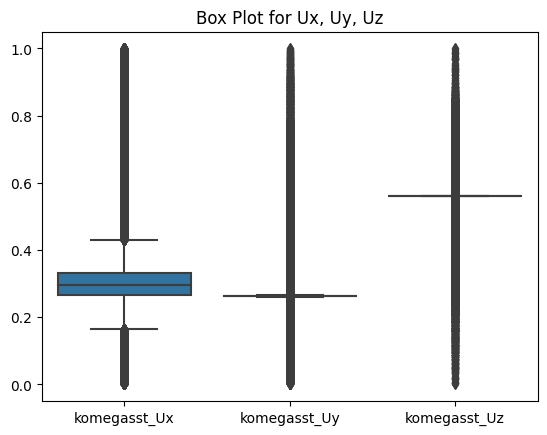

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم Box Plot للأعمدة المهمة
sns.boxplot(data=data[['komegasst_Ux', 'komegasst_Uy', 'komegasst_Uz']])
plt.title("Box Plot for Ux, Uy, Uz")
plt.show()


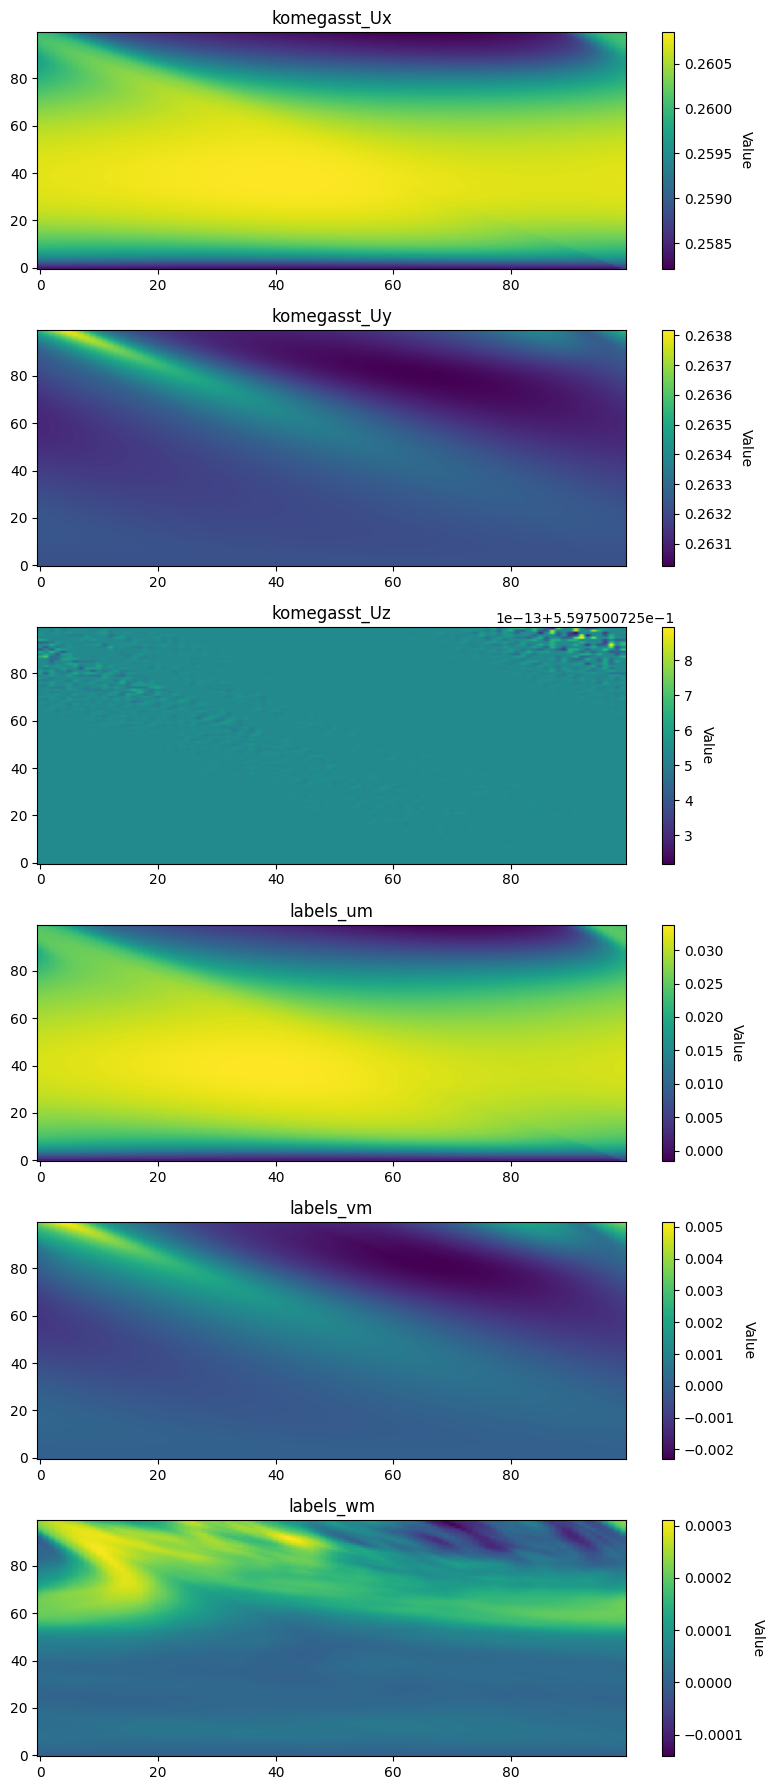

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Example features to visualize
features_to_plot = ['komegasst_Ux', 'komegasst_Uy', 'komegasst_Uz', 'labels_um', 'labels_vm', 'labels_wm']

# Reshape data into 2D grid (example grid size, adjust based on your data)
grid_size_x = 100  # Number of grid points in x-direction
grid_size_y = 100  # Number of grid points in y-direction

# Create a figure with subplots
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(8, len(features_to_plot) * 3))

for i, feature in enumerate(features_to_plot):
    # Reshape the feature data into a 2D grid
    reshaped_data = data[feature].values[:grid_size_x * grid_size_y].reshape((grid_size_x, grid_size_y))
    
    # Plot the feature
    im = axes[i].imshow(reshaped_data, origin='lower', aspect='auto', cmap='viridis')
    axes[i].set_title(f"{feature}", fontsize=12)
    
    # Add colorbar
    cbar = fig.colorbar(im, ax=axes[i])
    cbar.ax.set_ylabel('Value', rotation=270, labelpad=15)

# Adjust layout
plt.tight_layout()
plt.show()


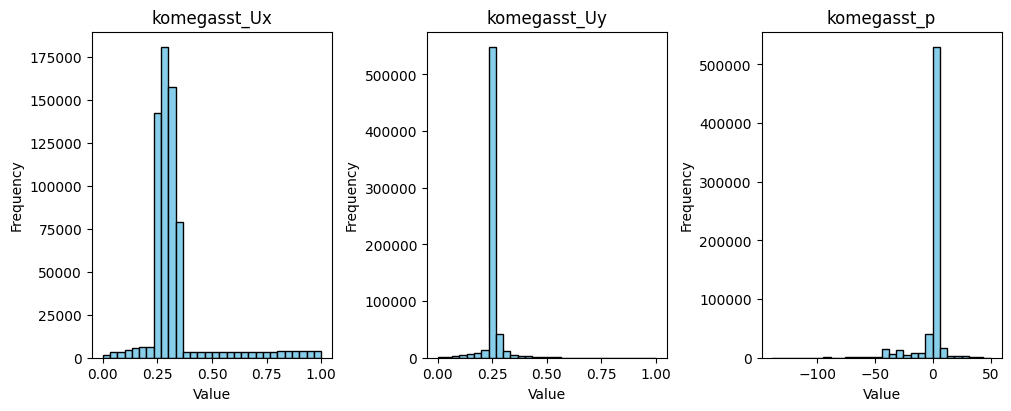

In [10]:
import matplotlib.pyplot as plt

# Features to plot
features = ['komegasst_Ux', 'komegasst_Uy', 'komegasst_p']

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(10, 4), constrained_layout=True)

for i, feature in enumerate(features):
    # Plot histogram for each feature
    axes[i].hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("Value")

# Display the plot
plt.show()


In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Select relevant features and labels
features = ['komegasst_Cx', 'komegasst_Cy', 'komegasst_Ux', 'komegasst_Uy']
labels = ['komegasst_p']

In [13]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features + labels])

# Split into features (X) and labels (y)
X = data_scaled[:, :-1]
y = data_scaled[:, -1:]

In [14]:
# Define PINNs model
def create_pinn(input_dim):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(input_dim,)),  # Use a tuple for input_shape
        keras.layers.Dense(64, activation="tanh", kernel_initializer="he_normal"),
        keras.layers.Dense(64, activation="tanh", kernel_initializer="he_normal"),
        keras.layers.Dense(64, activation="tanh", kernel_initializer="he_normal"),
        keras.layers.Dense(1, activation="linear")  # Output layer
    ])
    return model

# Create the PINNs model
pinn_model = create_pinn(input_dim=X.shape[1])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [15]:
# Preprocess the data
features = ["komegasst_Cx", "komegasst_Cy", "komegasst_Cz", "komegasst_Ux", "komegasst_Uy", "komegasst_Uz"]
target = ["komegasst_p"]  # Output variable

scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

X = scaler_features.fit_transform(data[features])
y = scaler_target.fit_transform(data[target])

In [16]:
from tensorflow.keras import layers, models

def create_pinn(input_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(64, activation="tanh", kernel_initializer="glorot_normal")(inputs)
    x = layers.Dense(64, activation="tanh", kernel_initializer="glorot_normal")(x)
    x = layers.Dense(64, activation="tanh", kernel_initializer="glorot_normal")(x)
    outputs = layers.Dense(1)(x)  # Ensure this uses the full input features
    return models.Model(inputs=inputs, outputs=outputs)

pinn_model = create_pinn(input_dim=X.shape[1])


In [17]:
print("First few rows of X_sample[:, :2]:", X_sample[:, :2].numpy())


NameError: name 'X_sample' is not defined

In [ ]:
pinn_model = create_pinn(input_dim=X.shape[1])


In [ ]:
@tf.function
def physics_loss(X, y_true, y_pred):
    # Extract input variables (assuming columns represent Cx, Cy, etc.)
    Cx, Cy, Cz = X[:, 0], X[:, 1], X[:, 2]

    # Compute gradients using automatic differentiation
    with tf.GradientTape(persistent=True) as tape:
        tape.watch([Cx, Cy])
        p_pred = y_pred

        dp_dCx = tape.gradient(p_pred, Cx)
        dp_dCy = tape.gradient(p_pred, Cy)

    # Physics-based residual: Continuity equation (example)
    equation_residual = dp_dCx + dp_dCy  # Modify based on your physics constraints

    # Compute the combined loss
    physics_loss = tf.reduce_mean(tf.square(equation_residual))
    supervised_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    total_loss = physics_loss + supervised_loss

    return total_loss


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

@tf.function
def train_step(X_batch, y_batch):
    with tf.GradientTape() as tape:
        y_pred = pinn_model(X_batch)
        loss = physics_loss(X_batch, y_batch, y_pred)

    gradients = tape.gradient(loss, pinn_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, pinn_model.trainable_variables))
    return loss


In [ ]:
# Debugging: Print input batch structure
print("X_batch shape:", X_batch.shape)
print("y_batch shape:", y_batch.shape)


In [ ]:
print("First few rows of X_batch:", X_batch.numpy()[:5])


In [ ]:
@tf.function
def physics_loss(X, y_true, y_pred):
    # Extract Cx and Cy
    Cx, Cy = X[:, 0], X[:, 1]

    with tf.GradientTape(persistent=True) as tape:
        # Watch Cx and Cy
        tape.watch(Cx)
        tape.watch(Cy)

        # Model prediction (ensure this uses Cx and Cy)
        p_pred = y_pred

    # Compute gradients of p_pred with respect to Cx and Cy
    dp_dCx = tape.gradient(p_pred, Cx)
    dp_dCy = tape.gradient(p_pred, Cy)

    # Debugging
    print(f"dp_dCx: {dp_dCx}")
    print(f"dp_dCy: {dp_dCy}")

    if dp_dCx is None or dp_dCy is None:
        raise ValueError("Gradients are not being computed. Verify model structure and input dependency.")

    # Compute the equation residual
    equation_residual = dp_dCx + dp_dCy

    # Physics-based loss
    physics_loss = tf.reduce_mean(tf.square(equation_residual))
    supervised_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    total_loss = physics_loss + supervised_loss

    return total_loss




In [ ]:
# Test dependency of gradients
sample_indices = np.random.choice(len(X), size=5)  # Small batch for testing
X_sample = tf.convert_to_tensor(X[sample_indices], dtype=tf.float32)
y_sample = tf.convert_to_tensor(y[sample_indices], dtype=tf.float32)

# Model prediction
y_pred_sample = pinn_model(X_sample)

# Test physics loss
try:
    physics_loss_value = physics_loss(X_sample, y_sample, y_pred_sample)
    print(f"Physics loss value: {physics_loss_value.numpy()}")
except ValueError as e:
    print(e)

